<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GCN-FIile" data-toc-modified-id="GCN-FIile-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GCN FIile</a></span></li><li><span><a href="#Load-and-Solve-Model" data-toc-modified-id="Load-and-Solve-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Solve Model</a></span><ul class="toc-item"><li><span><a href="#Sample-moments" data-toc-modified-id="Sample-moments-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample moments</a></span></li></ul></li></ul></div>

In [1]:
import gEconpy as ge
import gEconpy.plotting as gp

# GCN FIile

In [2]:
with open('baxter_king.gcn', 'r') as file:
    print(file.read())

block STEADY_STATE
{
	identities
	{
		tau[ss] = tau_bar;
		G_B[ss] = G_B_bar;
		I_G[ss] = I_G_bar;
		K_G[ss] = I_G[ss] / delta;

		r_G[ss] = 1 / beta;
		r[ss] = (1 / beta - (1 - delta)) / (1 - tau[ss]);
		w[ss] = (1 - theta_K) * (A_bar * K_G[ss] ^ theta_G) ^ (1 / (1 - theta_K)) *
			(theta_K / r[ss]) ^ (theta_K / (1 - theta_K));
		Y[ss] = ((1 - tau[ss]) * w[ss] / theta_L + G_B[ss] + I_G[ss]) /
				(1 + (1 - theta_K) / theta_L * (1 - tau[ss]) - delta * theta_K / r[ss]);
		K[ss] = theta_K * Y[ss] / r[ss];
		N[ss] = (1 - theta_K) * Y[ss] / w[ss];
		
		I[ss] = delta * theta_K * Y[ss] / r[ss];
		C[ss] = (1 - tau[ss]) / theta_L * (w[ss] - (1 - theta_K) * Y[ss]);
		L[ss] = 1 - N[ss];
		
		U[ss] = (1 / (1 - beta)) * (log(C[ss]) + theta_L * log(L[ss]));
        lambda[ss] = 1 / C[ss];
		lambda_L[ss] = w[ss] * (1 - tau[ss]) / C[ss];
		
		TC[ss] = -(w[ss] * N[ss] + r[ss] * K[ss]);
		Div[ss] = Y[ss] + TC[ss];
		TR[ss] = tau[ss] * (w[ss] * N[ss] + r[ss] * K[ss]) - G_B[ss] - I_G[ss];
	};
};

block H

# Load and Solve Model

In [3]:
mod = ge.gEconModel('baxter_king.gcn')

Model Building Complete.
Found:
	19 equations
	19 variables
	The following "variables" were defined as constants and have been substituted away:
		B_t,mc_t
	3 stochastic shocks
		 0 / 3 has a defined prior. 
	8 parameters
		 0 / 8 has a defined prior. 
	4 calibrating equations
	4 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



Even though I defined a complete steady state, the solver is still going to run an numerical optimizer to find the calibrated parameters. I don't have support for user definition of calibrated parameters yet.

In [4]:
mod.steady_state()
mod.solve_model(not_loglin_variable=[x.base_name for x in mod.variables])

Steady state found! Sum of squared residuals is 7.984282102087844e-21
Solution found, sum of squared residuals:  1.3878509154320441e-30
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


Values of parameters have been found that satisfy the calibrating constraints: $Y_{ss} = 1$, $r^G_{ss} = 6.5\%$, $w_{ss} = 2$, $N_{ss} = \frac{1}{3}$. Because $Y_ss$ was normalized to be 1, it means the steady-state values of fiscal policy parameters are simply the parameters $\bar{G}_B$ and $\bar{I}_G$, and steady-state income is $\bar \tau$. As a result. these didn't require any special treatment to hit the requested values.

In [5]:
mod.print_steady_state()

C_ss                 0.708
Div_ss              -0.000
G_B_ss               0.200
I_G_ss               0.020
I_ss                 0.072
K_G_ss               0.800
K_ss                 2.889
L_ss                 0.667
N_ss                 0.333
TC_ss               -1.000
TR_ss               -0.000
U_ss               -15.425
Y_ss                 1.000
lambda_L_ss          2.204
lambda_ss            1.413
r_G_ss               1.065
r_ss                 0.115
tau_ss               0.220
w_ss                 2.000


In addition, the following parameter values were calibrated:
A_bar                1.493
beta                 0.939
theta_K              0.333
theta_L              1.469


## Sample moments

When you solve a Dynare model you also get the covariance and auto-correlation matrices, we can look at those for fun. Evidently, government investment is extremely sensitive to shocks. In this version of gEconpy I just assume shock sigmas of 0.01.  This is updated already but I haven't cut a release for it yet. It's possible that these shock sizes are just too huge for fiscal policy shocks?

In [6]:
cov = mod.compute_stationary_covariance_matrix()
auto_corr = mod.compute_autocorrelation_matrix()

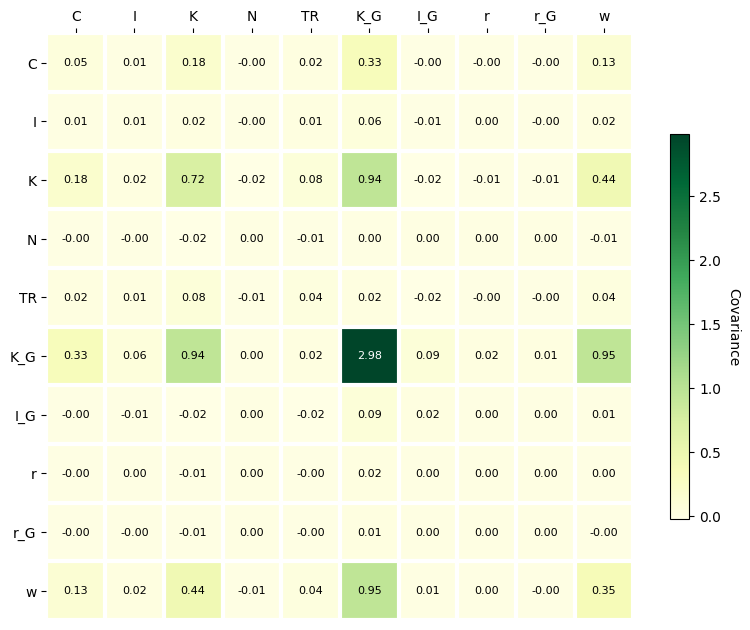

In [7]:
gp.plot_covariance_matrix(cov, vars_to_plot=['C', 'I', 'K', 'N', 'TR', 'K_G', 'I_G', 'r', 'r_G', 'w'], cbar_kw={'shrink':0.5});

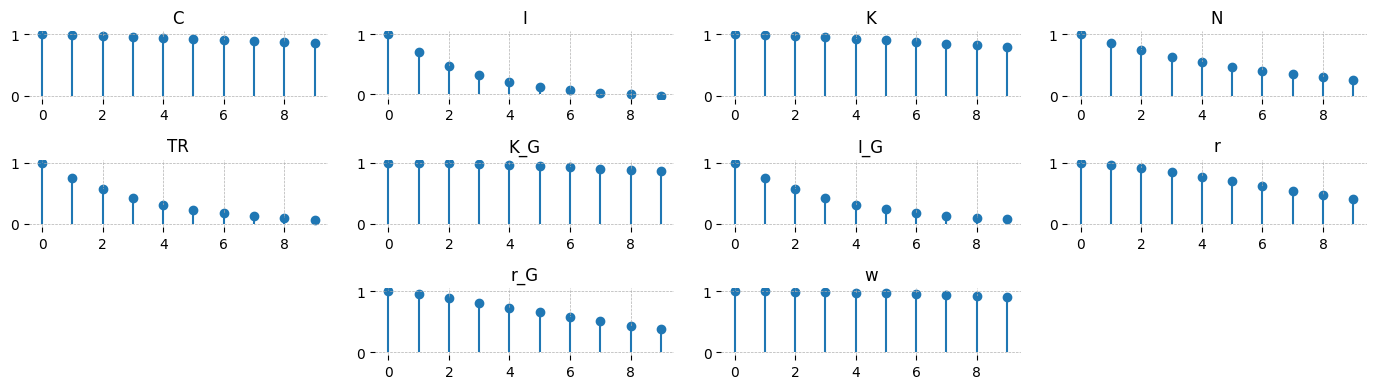

In [8]:
gp.plot_acf(auto_corr, vars_to_plot=['C', 'I', 'K', 'N', 'TR', 'K_G', 'I_G', 'r', 'r_G', 'w']);